In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [3]:
# Build a data frame with the portfolio tickers
tickers = ['MNKD', 'ACRX', 'ECYT']
portfolio_data = pd.DataFrame()
for tick in tickers:
    portfolio_data[tick] = wb.DataReader(tick, data_source="yahoo", start='2017-1-1')['Adj Close']
    

In [4]:
portfolio_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 2017-01-03 to 2017-10-23
Data columns (total 3 columns):
MNKD    204 non-null float64
ACRX    204 non-null float64
ECYT    204 non-null float64
dtypes: float64(3)
memory usage: 6.4 KB


In [5]:
portfolio_data.head()

,MNKD,ACRX,ECYT
Date,,,
2017-01-03,3.15,2.55,2.61
2017-01-04,3.40,2.65,2.66
2017-01-05,3.30,2.65,2.57
2017-01-06,3.35,2.60,2.67
2017-01-09,3.15,2.55,2.61


In [6]:
portfolio_data.tail()

,MNKD,ACRX,ECYT
Date,,,
2017-10-17,4.75,1.75,4.35
2017-10-18,4.13,1.75,4.91
2017-10-19,3.96,1.75,4.97
2017-10-20,4.11,2.00,5.19
2017-10-23,3.70,2.03,4.75


In [7]:
# Extract the very first row of the data
portfolio_data.iloc[0]

MNKD    3.15
ACRX    2.55
ECYT    2.61
Name: 2017-01-03 00:00:00, dtype: float64

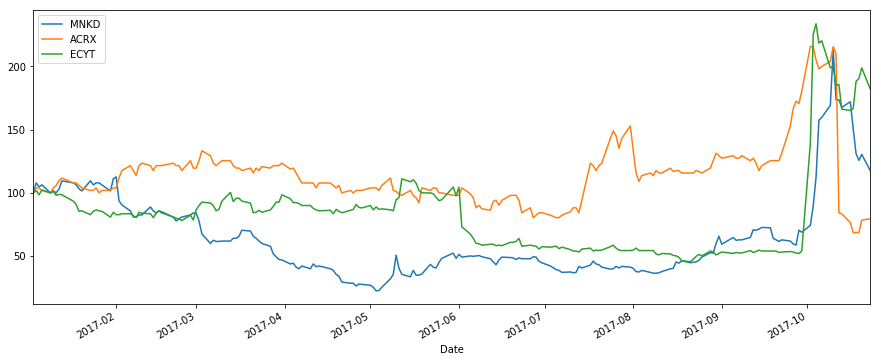

In [8]:
# Normalize returns to 100
(portfolio_data / portfolio_data.iloc[0] * 100).plot(figsize = (15,6));
plt.show()

In [12]:
# Calculate the daily returns of the portfolio
portfolio_returns_d = (portfolio_data/portfolio_data.shift(1)) - 1
portfolio_returns_d.head()

,MNKD,ACRX,ECYT
Date,,,
2017-01-03,NaN,NaN,NaN
2017-01-04,0.079365,0.039216,0.019157
2017-01-05,-0.029412,0.000000,-0.033835
2017-01-06,0.015152,-0.018868,0.038911
2017-01-09,-0.059701,-0.019231,-0.022472


In [18]:
# Set the weights of each asset
weights = np.array([0.60,.10,.30])

# Multiply the weight times daily return of each assets 
np.dot(portfolio_returns_d, weights)

array([             nan,   5.72877427e-02,  -2.77974348e-02,
         1.88772684e-02,  -4.44855455e-02,   1.68936540e-02,
        -1.65791166e-02,   2.50950728e-02,   3.75460005e-02,
        -2.73795214e-02,  -1.74300868e-02,  -3.74501486e-02,
        -9.73732960e-03,   3.42739218e-02,  -7.66908213e-03,
         1.49141752e-02,  -6.42845216e-03,  -8.20203081e-03,
        -4.30091694e-02,   7.23910864e-02,   1.78409825e-03,
        -9.38612809e-02,  -1.22980474e-02,  -2.82456140e-02,
        -4.20637269e-02,  -8.94080997e-03,   3.43755433e-02,
        -1.10202890e-03,   4.31966816e-02,  -3.56635522e-02,
         5.07936508e-03,   1.81700698e-02,  -1.37896825e-02,
        -3.58934711e-02,  -2.79603152e-02,   9.37408456e-03,
         4.42636746e-03,   3.46078431e-02,  -7.10252683e-03,
         3.07317073e-02,  -2.84180834e-02,  -6.31811767e-02,
        -7.30261491e-02,   1.46013709e-02,  -2.47669106e-02,
         5.63076037e-03,   2.71470454e-02,   2.21311475e-02,
        -3.34226365e-03,

In [15]:
# Find the average annual returns
annual_returns = portfolio_returns_d.mean() * 250
annual_returns

MNKD    0.965676
ACRX    0.396839
ECYT    1.927037
dtype: float64

In [17]:
# now calculate the  annual portfolio expected return
portfolio_expected = str(round(np.dot(annual_returns, weights), 5) *100) + ' %'
print(portfolio_expected)

119.72 %


In [20]:
weights_2 = np.array([0.25, 0.25, 0.25])
portfolio_expected2 = str(round(np.dot(annual_returns, weights_2), 5)* 100) + ' %'

In [21]:
print(portfolio_expected2)

82.239 %
